# 10-armed Testbed

This exercise serves to compare different strategies on the 10-armed Testbed problem as stated in the [Reinforcement Learning: An introduction](http://incompleteideas.net/book/the-book.html) book by *Richard S. Sutton* and *Andrew G. Barto*.

This is a suite of test problems with 2000 randomly generated k-armed bandits with k = 10. For each bandit problem the action values q\*(a) for each a=0,1,…,9 are selected according to a normal distribution of mean 0 and variance 1 and stored in bandit_means array. Then for a selected action at time *t*, the actual reward is selected from a normal distribution of mean bandit_means\[a\] and variance 1.
The learning strategies that are compared in this exercise are **epsilon-greedy**, **optimistic initialization** and **UCB**. Each run consists of a 1000 steps where the selected rewards are saved for each learning strategy in a 2000x1000 array and then the rewards are averaged over the runs and shown in the final graph.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
np.random.seed(1)

In [20]:
def bandit(a, bandit_means):
    """
    Select action a which must be an integer between 0 and 9
    And return a reward drawn from a normal distrbution of mean bandit_means[a] and std deviation of 1
    """
    return np.random.normal(bandit_means[a], 1)

In [21]:
def select_random_action():
    a = np.random.randint(0, 10)
    return bandit(a, bandit_means), a

In [22]:
def select_greedy_action(Q):
    a = np.argmax(Q)
    return bandit(a, bandit_means), a

In [23]:
def select_epsilon_greedy_action(Q, N, epsilon = 0.01):
    reward = 0
    if np.random.uniform() < epsilon:
        reward, a = select_random_action()
    else:
        reward, a = select_greedy_action(Q)
    N[a] += 1
    Q[a] += (reward - Q[a])/N[a]
    return reward, a

In [24]:
# We first run a simulation of two epsilon-greedy methods with two values for epsilon
R = 2000
T = 1000
rewards_epsilon_greedy_small = np.zeros((R, T))
rewards_epsilon_greedy = np.zeros((R, T))
epsilon_small = 0.01
epsilon_large = 0.1

In [25]:
def run_epsilon_greedy(r):
    Q_epsilon_greedy_small = np.zeros(10)
    N_epsilon_greedy_small = np.zeros(10)
    Q_epsilon_greedy = np.zeros(10)
    N_epsilon_greedy = np.zeros(10)
    for t in range(T):
        rewards_epsilon_greedy_small[r][t], _ = select_epsilon_greedy_action(Q_epsilon_greedy_small, N_epsilon_greedy_small, epsilon_small)
        rewards_epsilon_greedy[r][t], _ = select_epsilon_greedy_action(Q_epsilon_greedy, N_epsilon_greedy, epsilon_large)

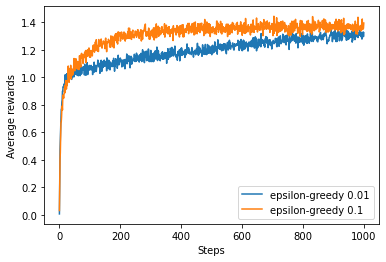

In [26]:
for r in range(R):
    bandit_means = np.random.normal(0, 1, 10)
    run_epsilon_greedy(r)
avg_rewards_epsilon_greedy_small = rewards_epsilon_greedy_small.mean(axis=0)
avg_rewards_epsilon_greedy = rewards_epsilon_greedy.mean(axis=0)
plt.plot(avg_rewards_epsilon_greedy_small, label = 'epsilon-greedy ' + str(epsilon_small))
plt.plot(avg_rewards_epsilon_greedy, label = 'epsilon-greedy ' + str(epsilon_large))
plt.xlabel('Steps')
plt.ylabel('Average rewards')
plt.legend()

In [27]:
# Let's select the larger value for epsilon and compare epsilon-greedy to the other methods
rewards_epsilon_greedy = np.zeros((R, T))
rewards_optimistic_init = np.zeros((R, T))
rewards_ucb = np.zeros((R, T))

In [32]:
def select_ucb(Q, N, t, c=1):
    """Return tuple reward,action at step t given value estimations Q and number of selections N using the UCB method"""
    a = np.argmax(Q + c * np.sqrt(np.log(t+1) / N))
    reward = bandit(a, bandit_means)
    N[a] += 1
    Q[a] += (reward - Q[a]) / N[a]
    return reward, a

In [33]:
def run(r):
    Q_epsilon_greedy = np.zeros(10)
    N_epsilon_greedy = np.zeros(10)
    Q_optimistic_init = np.ones(10) * 5
    N_optimistic_init = np.zeros(10)
    Q_ucb = np.zeros(10)
    N_ucb = np.ones(10) * 0.00001
    for t in range(T):
        rewards_epsilon_greedy[r][t], _ = select_epsilon_greedy_action(Q_epsilon_greedy, N_epsilon_greedy, epsilon = epsilon_large)
        rewards_optimistic_init[r][t], _ = select_epsilon_greedy_action(Q_optimistic_init, N_optimistic_init, epsilon = 0.0)
        rewards_ucb[r][t], _ = select_ucb(Q_ucb, N_ucb, t)
    

In [34]:
for r in range(R):
    bandit_means = np.random.normal(0, 1, 10)
    run(r)
avg_rewards_epsilon_greedy = rewards_epsilon_greedy.mean(axis=0)
avg_rewards_optimistic_init = rewards_optimistic_init.mean(axis=0)
avg_rewards_ucb = rewards_ucb.mean(axis=0)

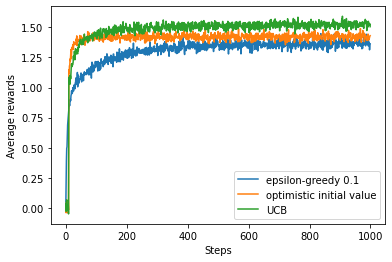

In [35]:
plt.plot(avg_rewards_epsilon_greedy, label = 'epsilon-greedy ' + str(epsilon_large))
plt.plot(avg_rewards_optimistic_init, label = 'optimistic initial value')
plt.plot(avg_rewards_ucb, label = 'UCB')
plt.xlabel('Steps')
plt.ylabel('Average rewards')
plt.legend()